# Visualizing Feature Maps

The structure of a convolutional neural network dictates it search for features across an image when running through it. Again, we will use the [VGG19 model](https://arxiv.org/pdf/1409.1556.pdf) to help with our visualizations. We import the necessary libraries and the model, then summarise the VGG19 model.

In [25]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims
from google.colab import files

model = VGG19()
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

We find that the last layer in each of the convolutional blocks are in the 2nd, 5th, 10th, 15th and 20th positions of the list. We pull these out separately to extract the feature maps.

In [26]:
ixs = [2, 5, 10, 15, 20]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Next we get an image sample to run through the network to find out the features it captures in it.

In [27]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
image_path = '/content/drive/My Drive/Coding/ConvNets/Visualizing Feature Maps/rotunda.jpg'
image = load_img(image_path, target_size=(224, 224))

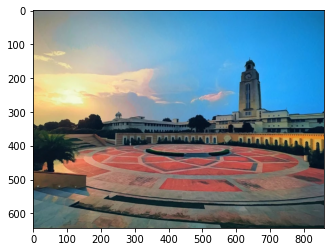

In [29]:
img = plt.imread(image_path)
plt.imshow(img)

In [0]:
image = img_to_array(image)
image = expand_dims(image, axis=0)
image = preprocess_input(image)

Now we run the image through the model normally, to let it predict. TensorFlow allows us to capture the feature maps of the image as it passes through the layers, and we will capture the features for the five layers highlighted in the list `ixs` above. The features highlighted from the first few layers are quite intricate and they highlight edges, major features in the image and so on. As you go deeper into the model, the feature maps get sort of obscure, with the model's own code for decision making, where it fires up only a certain pixel for a certain feature and so on.

In [31]:
feature_maps = model.predict(image)
for x in feature_maps:
  print(x.shape)

(1, 112, 112, 64)
(1, 56, 56, 128)
(1, 28, 28, 256)
(1, 14, 14, 512)
(1, 7, 7, 512)


In [36]:
square = 8

for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	fig = plt.figure(figsize=(32, 19))
	ix = 0
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = fig.add_subplot(square, square, ix+1)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, ix], cmap='gray')
			ix += 1
	 
	fig.show()
	fig.savefig('fmap.png')
	files.download('fmap.png')

Output hidden; open in https://colab.research.google.com to view.